In [1]:
import numpy as np
import pymorphy2
import codecs

In [2]:
mat_s = np.load('G:\!!!!!!!project/ru_1000_freq_s.npy')
mat_v = np.load('G:\!!!!!!!project/ru_1000_freq_v.npy')
print(mat_s.shape)
print(mat_v.shape)

(133709, 1000)
(1000,)


In [3]:
file_dict = codecs.open('G:\!!!!!!!project/unique_ru_dict.txt',encoding='utf-8')

In [4]:
dict_words = {}
cnt = 0
line = (file_dict.readline().split())
while line:
    work_line = line[0]
    while (work_line[-1] == '?'):
        work_line = work_line[0:-1]
    dict_words[work_line] = cnt
    cnt += 1
    line = file_dict.readline().split()

In [5]:
print(dict_words['взрогатить'])

12691


In [6]:
print(mat_s[1269])

[ -3.37750763e-08   5.47060952e-08  -4.56521968e-08   1.77360145e-08
  -8.58953617e-08   3.77327209e-08  -4.22748216e-08   2.82449279e-08
   5.46885964e-08   5.48357642e-08  -1.55709139e-07   8.06673753e-08
  -1.86387644e-08  -1.70553070e-09  -7.74018691e-08   2.24073818e-07
   5.47933922e-08   4.04643717e-08   1.16695272e-08   2.17557306e-07
  -8.23934067e-08   5.70145804e-08  -7.84302731e-08   4.84011434e-08
  -5.76457081e-08  -1.24260500e-07  -8.11059910e-08   8.07279318e-08
  -3.75084470e-08  -1.50517431e-08   5.43424328e-08   1.06577129e-07
   6.03537519e-08   1.94966442e-08  -1.32927566e-07   7.96405580e-09
  -4.42233927e-08  -2.64089176e-08  -1.56251284e-08  -2.90504897e-10
  -5.94446862e-08   7.00357656e-08  -4.17941243e-08   1.66897670e-08
   2.93272854e-09   7.40456962e-08  -4.87103576e-08   7.65073443e-08
   9.62135670e-08   2.47479432e-07  -6.02145136e-10  -1.09999295e-08
  -2.61898694e-08  -4.14970899e-08   5.68772662e-08   1.13337524e-08
   1.40230171e-07  -2.47473344e-07

In [7]:
file_dict.close()

In [8]:
file_book = open('G:\!!!!!!!project/David_2.txt', 'r')
morph = pymorphy2.MorphAnalyzer()
vectors = {}
vector_map = list()
cnt_bad = 0
cnt_good = 0
for line_in_book in file_book:
    line_in_book = (line_in_book.split())
    for word in line_in_book:
        new_word = ''
        for char in word:
            if (char.isalpha()):
                new_word += char
        new_word = new_word.lower()
        if (new_word.isalpha()):
            len_form = len(morph.parse(new_word))
            need_cnt = 0
            for i in range(len_form):
                p = morph.parse(new_word)[i]
                if (p.normal_form == new_word):
                    need_cnt = i
                    break
            p = morph.parse(new_word)[need_cnt]
            if (dict_words.get(p.normal_form) != None):
                if (vectors.get(p.normal_form) == None): 
                    vector_map.append(dict_words[p.normal_form])
                    cnt_good += 1
                    vectors[p.normal_form] = 1
            else:
                cnt_bad += 1
print(len(vectors))
print(cnt_bad)
print(cnt_good)
file_book.close()

12405
20537
12405


In [80]:
print(vector_map)

[127661, 25773, 30508, 28617, 45191, 38580, 103370, 89311, 356, 10117, 40105, 76551, 37587, 132785, 43460, 133125, 21354, 129049, 129103, 45955, 39568, 96746, 54740, 72404, 65403, 57854, 27409, 8038, 99713, 36856, 105009, 118657, 102986, 125672, 40498, 117983, 81987, 74451, 89217, 56103, 38859, 70502, 10019, 60418, 104437, 106584, 3, 106088, 98435, 53930, 96945, 107652, 27423, 23813, 127077, 97900, 55700, 111886, 117027, 70636, 40470, 9914, 61104, 128879, 108496, 26354, 110572, 41742, 117283, 69282, 132378, 11964, 56993, 107059, 66689, 24140, 80514, 85517, 132779, 86440, 62941, 103762, 14515, 51682, 23216, 73025, 78186, 43703, 24485, 15053, 38366, 129156, 9277, 70500, 73569, 114341, 55295, 127733, 105404, 117193, 30355, 114635, 106577, 28900, 121109, 58043, 122914, 95325, 116067, 54232, 65311, 90494, 97145, 108326, 126325, 82891, 113152, 120547, 114629, 65420, 127922, 111740, 128884, 39755, 11623, 8006, 127978, 79030, 19078, 115346, 54306, 111152, 105475, 72013, 105340, 50637, 37248, 1

In [11]:
x_1 = list()
y_1 = list()
z_1 = list()
cor_min = 10000
cor_max = -10000
cor_abs_num = 10000
for vec in vector_map:
    vec_space = mat_s[vec:vec+1,:] * mat_v
    for i in range(vec_space.shape[1]):
        if (vec_space[0,i] > cor_max):
            cor_max = vec_space[0,i]
        elif (vec_space[0,i] < cor_min):
            cor_min = vec_space[0,i]
        elif (abs(vec_space[0,i]) < cor_abs_num and abs(vec_space[0,i]) > 0):
            cor_abs_num = abs(vec_space[0,i])
    x_1.append(vec_space[0,0])
    y_1.append(vec_space[0,1])
    z_1.append(vec_space[0,2])
print(cor_min, cor_max, cor_abs_num)

-2.90533535456 2.58041223648 2.70299706407e-22


In [105]:
for k in range(1, 11):
    i =  10 ** (-4) * k
    vect_boxes = np.array([[0,0,0]])
    boxes_sum = [0]
    first_box = 1
    for vec in vector_map:
        vec_space = mat_s[vec:vec + 1,:] * mat_v
        vec_space = vec_space[:,0:3]
        vec_space = vec_space / i
        vec_space = np.round(vec_space, 0)
        new_box = vec_space
        if (first_box):
            vect_boxes[0:1,:] = vec_space
            first_box = 0
            boxes_sum[0] = 1
        else:
            equal = 0
            for j in range(vect_boxes.shape[0]):
                if (np.array_equal(new_box, vect_boxes[j:j+1,:])):
                    boxes_sum[j] += 1;
                    equal = 1
                    break;
            if (not equal):
                vect_boxes = np.concatenate((vect_boxes, new_box), axis=0)
                boxes_sum.append(1)
    print(len(boxes_sum))
    boxes_sum.sort()
    mat_ans = np.array([boxes_sum])
    k_ans = 0
    for k in range(mat_ans.shape[1]):
        if (mat_ans[0,k] > 5):
            k_ans = k
            break
    print(mat_ans[:,k_ans:])

4578
[[   6    6    6    6    6    6    6    6    6    6    6    6    6    6
     6    6    6    6    6    6    6    6    6    6    6    7    7    7
     7    7    7    7    7    7    7    7    7    7    8    8    8    8
     8    8    8    8    8    8    8    8    8    8    8    9    9    9
     9    9    9    9    9   10   10   10   10   10   10   10   11   11
    11   11   11   12   12   12   12   13   14   15   15   15   15   15
    16   16   16   16   16   17   17   17   18   19   19   19   20   20
    20   20   20   22   22   22   23   24   25   25   26   27   28   30
    31   31   33   33   33   38   39   41   43   49   51   53   56   56
    73   76   91   94   95  119  176  230  561 3607]]
3126
[[   6    6    6    6    6    6    6    6    6    6    6    6    6    6
     6    6    6    6    6    6    6    6    6    6    6    6    6    6
     6    6    7    7    7    7    7    7    7    7    7    7    7    7
     7    7    7    7    7    7    7    7    8    8    8    8    8    8


In [96]:
test1 = [1,2,3]
test = np.array([test1])
print(test.shape)
ars = [1,2,3]
print(np.round(test,0))

(1, 3)
[[1 2 3]]


c:\programdata\miniconda3\lib\site-packages\matplotlib\collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


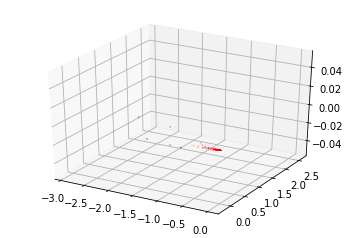

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d 
  # координаты точек
X = x_1
Y = y_1
Z = z_1
# построение и отображение графика
plt.gca(projection='3d')   # указываем тип
plt.scatter(X,Y,Z,color='red')                   # строим
plt.show()

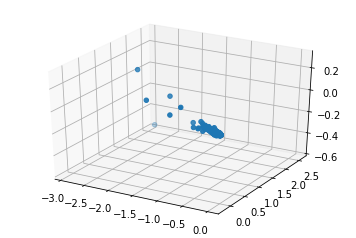

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d 
  # координаты точек
# построение и отображение графика
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(x_1, y_1, z_1)
plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d 
# координаты точек
t = np.linspace(0, len(x_1), len(x_1))
print(t)
x = x_1[t]
y = y_1[t]
z = z_1[t]
fig = figure()
ax = Axes3D(fig)
ax.plot(x,y,z)

[  0.00000000e+00   1.00008062e+00   2.00016124e+00 ...,   1.24029998e+04
   1.24039999e+04   1.24050000e+04]


TypeError: only integer scalar arrays can be converted to a scalar index